In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
customers_df = pd.read_csv("Customers.csv")
products_df= pd.read_csv("Products.csv")
transactions_df= pd.read_csv("Transactions.csv")

In [15]:
merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

customer_profiles = merged_df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'Price_x': 'mean'
}).reset_index()

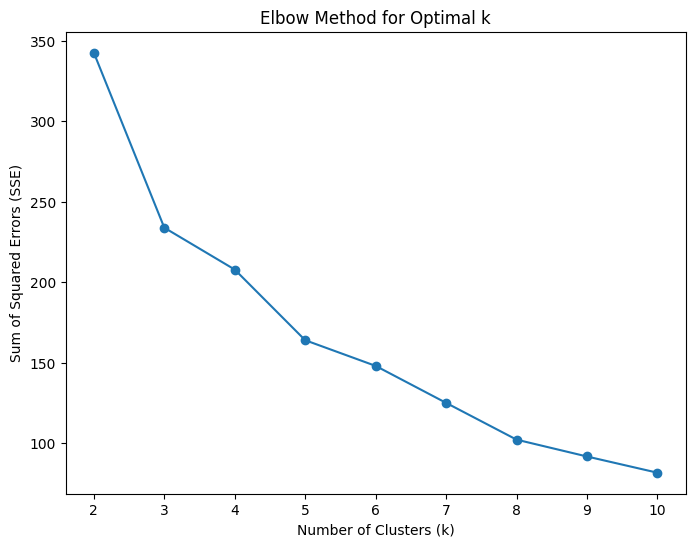

In [16]:
customer_profiles.rename(columns={'Price_x': 'AveragePrice'}, inplace=True)

customer_profiles = customer_profiles.merge(customers_df[['CustomerID', 'Region']], on='CustomerID')
customer_profiles = pd.get_dummies(customer_profiles, columns=['Region'], prefix='', prefix_sep='')

scaler = StandardScaler()
features = ['Quantity', 'TotalValue', 'AveragePrice']
customer_profiles[features] = scaler.fit_transform(customer_profiles[features])

# Determining the optimal number of clusters using the Elbow Method
sse = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_profiles[features])
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

Davies-Bouldin Index: 1.12180191226693


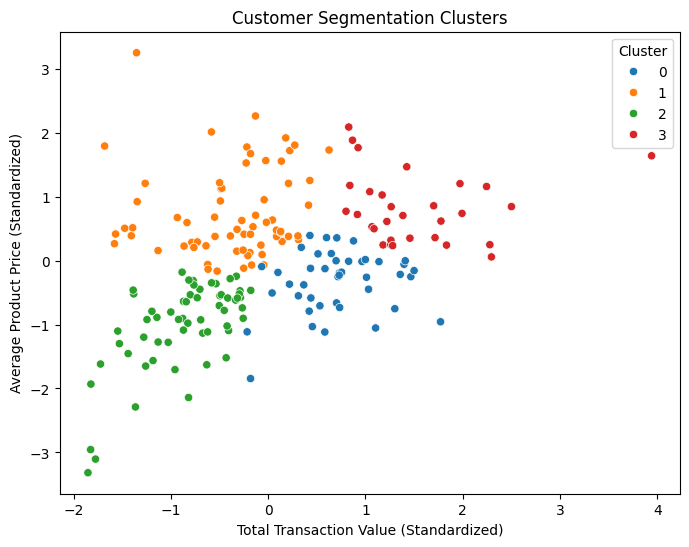

Clustering results saved to 'Customer_Segmentation.csv'


In [17]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(customer_profiles[features])

# Evaluating clusters using Davies-Bouldin Index
db_index = davies_bouldin_score(customer_profiles[features], customer_profiles['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_profiles, x='TotalValue', y='AveragePrice', hue='Cluster', palette='tab10')
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Transaction Value (Standardized)')
plt.ylabel('Average Product Price (Standardized)')
plt.legend(title='Cluster')
plt.show()

customer_profiles.to_csv('Customer_Segmentation.csv', index=False)
print("Clustering results saved to 'Customer_Segmentation.csv'")

In [18]:
# Additional metrics: Silhouette Score
silhouette_avg = silhouette_score(customer_data[numeric_features], optimal_labels)
print(f"Silhouette Score for optimal clusters: {round(silhouette_avg, 4)}")

Silhouette Score for optimal clusters: 0.3709
